In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
#drop id columns
train_Id = train.Id
test_Id = test.Id

train.drop("Id", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)


In [6]:
print(f"train size: {train.shape}")
print(f"test size: {test.shape}")

train size: (1460, 80)
test size: (1459, 79)


# 1. Data Pre-procesing
---

### Target Variable

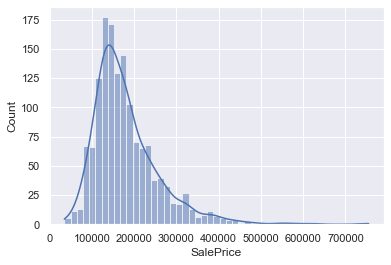

In [7]:
sns.histplot(train, x="SalePrice", kde="True")

In [8]:
print("Kurtosis: {}".format(train["SalePrice"].kurt()))
print("Skewness: {}".format(train["SalePrice"].skew()))

Kurtosis: 6.536281860064529
Skewness: 1.8828757597682129


**best estimators for SalePrice**

In [9]:
corrmat = train.corr()
best_features = corrmat["SalePrice"].nlargest(10)
best_features

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

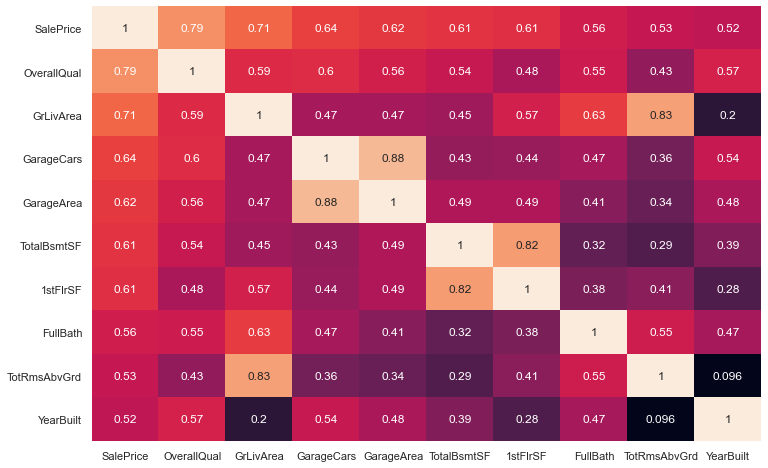

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat.loc[best_features.index, best_features.index], cbar=False, annot=True)

In [11]:
best_features.index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

drop some feature correlated with each other

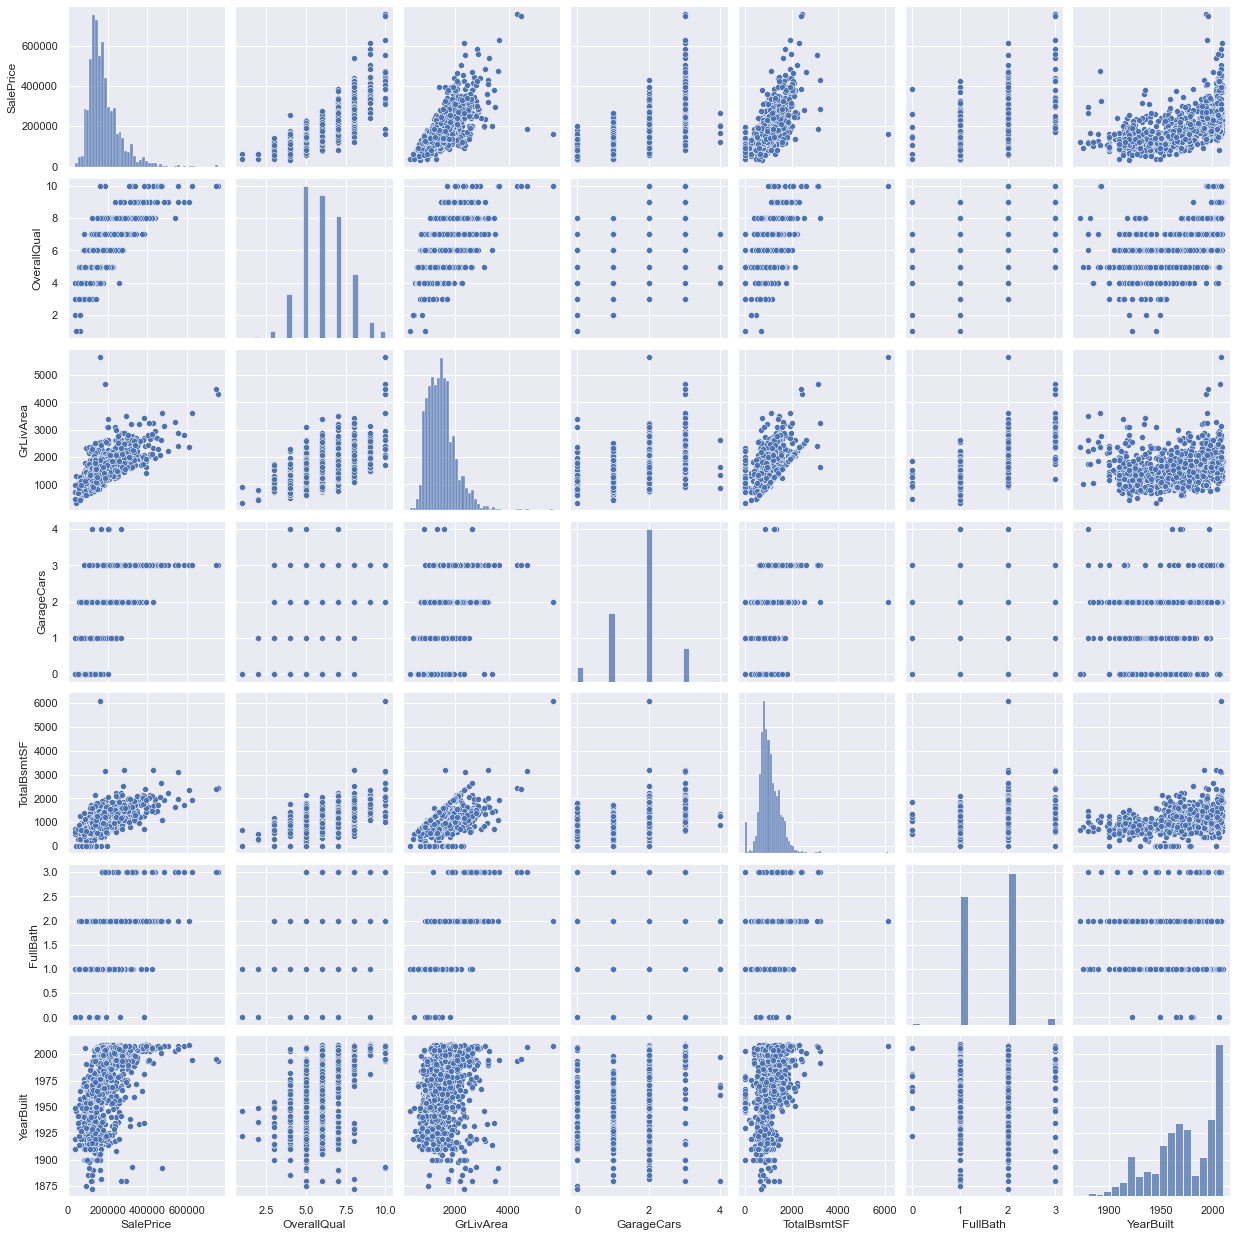

In [12]:
best_index = best_features.index.drop(["1stFlrSF", "GarageArea", "TotRmsAbvGrd"])
sns.pairplot(train[best_index])

**Drop outliers**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


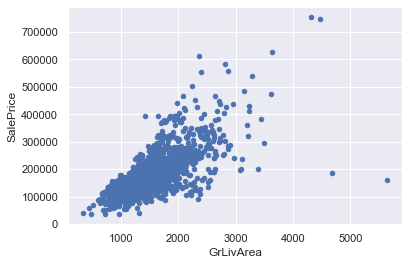

In [13]:
train.plot.scatter(y="SalePrice", x="GrLivArea")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


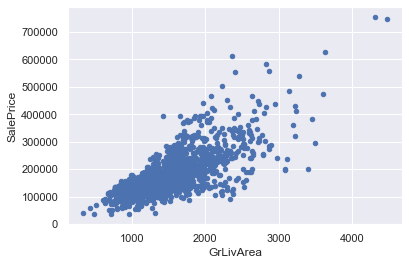

In [14]:
outliers = train[(train["GrLivArea"]>4000) & (train["SalePrice"]<300000)].index
train.drop(outliers, inplace=True)
train.plot.scatter(x="GrLivArea", y="SalePrice")

/Users/axel/ml/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


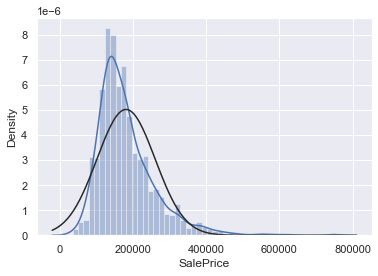

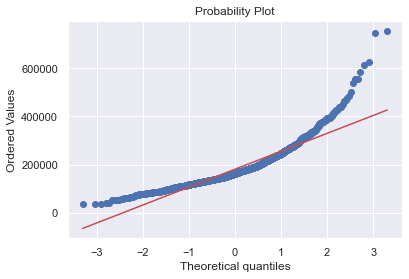

In [15]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

# histogram
plt.figure()
sns.distplot(train["SalePrice"], fit=norm)

# Normal probability plot 
plt.figure()
_ = stats.probplot(train["SalePrice"], plot=plt)
plt.show()

**Log transformation of the target varaible** (to be closer to normality)

In [16]:
train["SalePrice"] = np.log(train["SalePrice"])

/Users/axel/ml/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


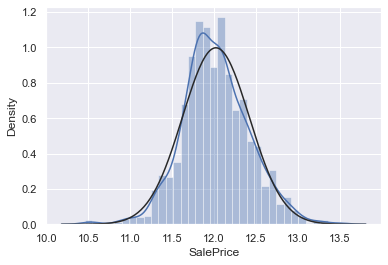

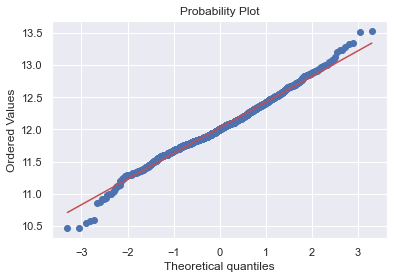

In [17]:
# histogram
plt.figure()
sns.distplot(train["SalePrice"], fit=norm)

# Normal probability plot 
plt.figure()
_ = stats.probplot(train["SalePrice"], plot=plt)
plt.show()

### Features engineering

Concatenate the train and test set

In [18]:
ntrain = len(train)
ntest = len(test)
dataset = pd.concat([train,test])
# dataset.drop("SalePrice", axis=1, inplace=True)

print(f"TRAINING SIZE {train.shape}")
print(f"TESTING SIZE {test.shape}")
print("---")
print(f"CONCATENATION {dataset.shape}")

TRAINING SIZE (1458, 80)
TESTING SIZE (1459, 79)
---
CONCATENATION (2917, 80)


In [19]:
dataset.SalePrice

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1454          NaN
1455          NaN
1456          NaN
1457          NaN
1458          NaN
Name: SalePrice, Length: 2917, dtype: float64

**Missing values (NaN)**

In [20]:
missing_rate = (dataset.isnull().sum() / dataset.shape[0]) * 100
missing_data = pd.concat([dataset.isnull().sum(), missing_rate], axis=1, keys=["total", "rate"])
missing_data.sort_values(by="total", ascending=False).head(35)

,total,rate
PoolQC,2908,99.691464
MiscFeature,2812,96.400411
Alley,2719,93.212204
Fence,2346,80.425094
SalePrice,1459,50.017141
FireplaceQu,1420,48.680151
LotFrontage,486,16.660953
GarageCond,159,5.450806
GarageFinish,159,5.450806
GarageQual,159,5.450806


In [21]:
dataset.isna().any(0).value_counts()

False    45
True     35
dtype: int64

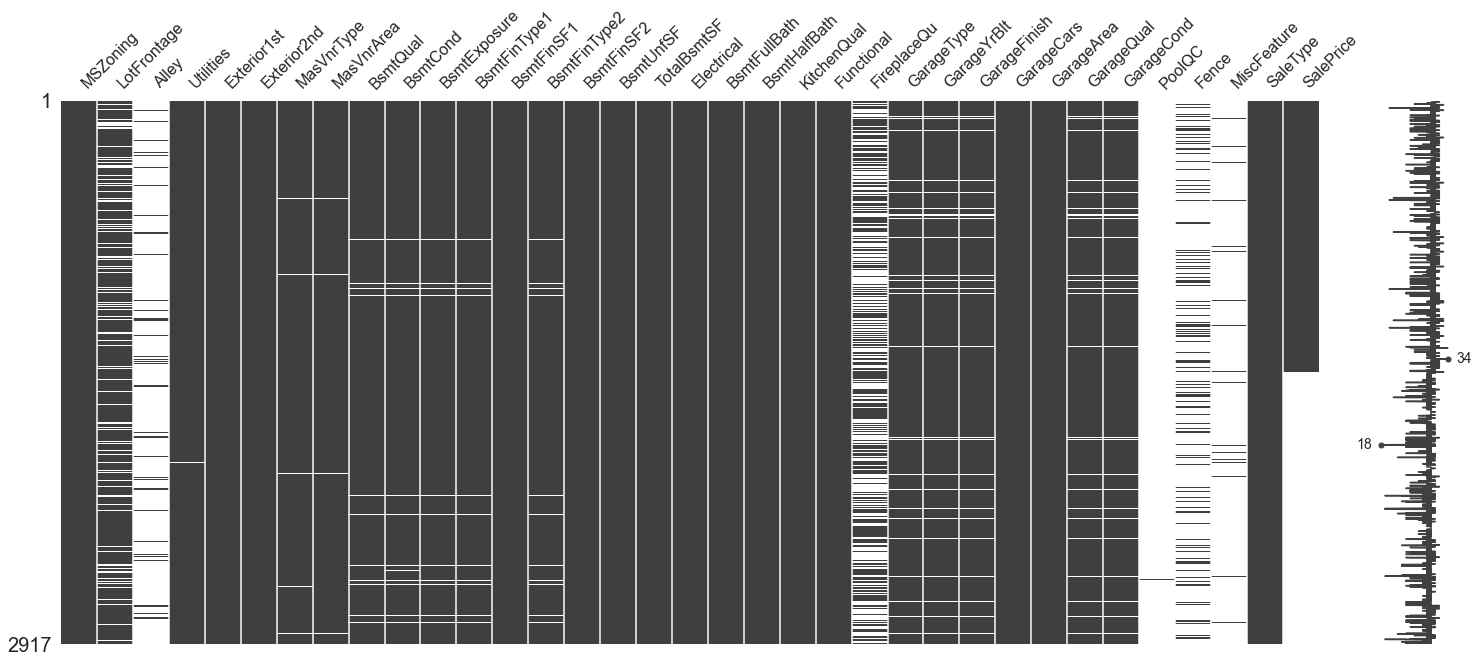

In [22]:
import missingno as msno
col_with_nan = dataset.loc[:,dataset.isna().any(0)]
msno.matrix(col_with_nan)

→ NaN values give info about house's features:
- *Basement*: 97.5%
- *Garage*: 95%
- *Fireplace*: 83%
- *Fence*: 20%
- *Alley*: 7%
- *Pool*: 1%

**Data Correlation**

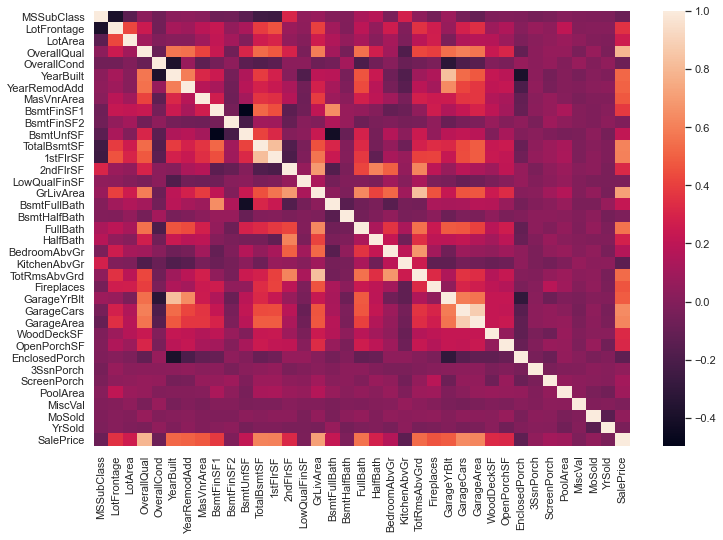

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat, vmax=1)

**Imputing missing values**

replace by None

In [24]:
replace_by_none = [
    "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "MasVnrType", "MSSubClass", 
    "GarageCond", "GarageType", "GarageFinish", "GarageQual",
    "BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtCond", "BsmtFinType1"]

for col in replace_by_none:
    dataset[col].fillna("None", inplace=True)

replace by 0

In [25]:
replace_by_zero = ["MasVnrArea", "GarageYrBlt", "GarageArea", "GarageCars", 
                   "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]

for col in replace_by_zero:
    dataset[col].fillna(0, inplace=True)
dataset["MasVnrArea"].fillna(0, inplace=True)

**LotFrontage**: Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood. *- idea from this [beautifull notebook](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)*

In [26]:
dataset["LotFrontage"] = dataset.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

replace by most frequent

In [27]:
replace_by_mode = ["Electrical", "SaleType", "Exterior1st", 
                   "Exterior2nd", "KitchenQual", "MSZoning", "Functional"]
for col in replace_by_mode:
    dataset[col] .fillna(dataset[col].mode()[0], inplace=True)

**Utilities** : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [28]:
dataset["Utilities"].value_counts()

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

In [29]:
dataset.drop('Utilities', axis=1, inplace=True)

Check if there is reamining missing value

In [30]:
dataset.drop("SalePrice", axis=1).isna().sum().sum()

0

It remains no missing value.

In [31]:
dataset.SalePrice

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1454          NaN
1455          NaN
1456          NaN
1457          NaN
1458          NaN
Name: SalePrice, Length: 2917, dtype: float64

### More features engineering

In [32]:
dataset.dtypes.value_counts()

object     42
int64      25
float64    12
dtype: int64

**transform numerical variables which are categorical**

In [33]:
dataset["MSSubClass"] = dataset["MSSubClass"].astype("str")

dataset["MoSold"] = dataset["MoSold"].astype("str")
# dataset["YrSold"] = dataset["YrSold"].astype("str")

**label encoding some categorical data** *(contain information in their ordering)*

In [34]:
from sklearn.preprocessing import LabelEncoder

order_mater = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", 
               "HeatingQC", "CentralAir", "KitchenQual", "FireplaceQu", "GarageFinish", "GarageQual",  
               "GarageCond", "PoolQC", "BsmtFinType1", "BsmtFinType1", "Functional", "LandSlope", 
               "LotShape", "PavedDrive"]

for col in order_mater:
    lbe = LabelEncoder()
    dataset[col] = lbe.fit_transform(dataset[col].values)

In [35]:
from sklearn.preprocessing import OrdinalEncoder

order_mater = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", 
               "HeatingQC", "CentralAir", "KitchenQual", "FireplaceQu", "GarageFinish", "GarageQual",  
               "GarageCond", "PoolQC", "BsmtFinType1", "BsmtFinType1", "Functional", "LandSlope", 
               "LotShape", "PavedDrive"]

cat_to_int = OrdinalEncoder(dtype="int")
dataset[order_mater] = cat_to_int.fit_transform(dataset[order_mater].values)

**create new feature** *(by combining existing one)*

In [36]:
dataset["OverallGrade"] = dataset["OverallQual"] * dataset["OverallCond"]
dataset["GarageGrade"] = dataset["GarageQual"] * dataset["GarageCond"]
dataset["ExterGrade"] = dataset["ExterQual"] * dataset["ExterCond"]
dataset["TotalBath"] = dataset["BsmtFullBath"] + 0.5 * dataset["BsmtHalfBath"] + \
                       dataset["FullBath"] + 0.5 * dataset["HalfBath"]
dataset["TotalSF"] = dataset["TotalBsmtSF"] + dataset["1stFlrSF"] + dataset["2ndFlrSF"]

In [37]:
dataset.shape

(2917, 84)

In [38]:
np.abs(dataset.corr().SalePrice).sort_values(ascending=False)[:20]

SalePrice       1.000000
TotalSF         0.825326
OverallQual     0.821404
GrLivArea       0.725211
GarageCars      0.681033
TotalBath       0.676678
GarageArea      0.656128
TotalBsmtSF     0.647563
1stFlrSF        0.620500
OverallGrade    0.607983
FullBath        0.595899
ExterQual       0.587213
YearBuilt       0.587043
BsmtQual        0.578564
YearRemodAdd    0.565992
TotRmsAbvGrd    0.537702
KitchenQual     0.537038
Fireplaces      0.491998
MasVnrArea      0.430569
HeatingQC       0.426052
Name: SalePrice, dtype: float64

#### Note:
- `TotalSF` is highly correlated with the SalePrice  
- `TotalSF`, `TotalBath` `ExterGrade` perform better than their detailled features
- creating order in `ExterQual` improve the correlation with SalePrice

**Skewed features**

In [39]:
num_col = dataset.select_dtypes(exclude="object").columns
skewness = np.abs(dataset[num_col].skew()).sort_values(ascending=False)
skewness.head(20)

MiscVal          21.950962
PoolQC           21.228518
PoolArea         17.697766
LotArea          13.116240
LowQualFinSF     12.090757
3SsnPorch        11.377932
LandSlope         4.975813
KitchenAbvGr      4.302763
BsmtFinSF2        4.146636
Functional        4.056212
EnclosedPorch     4.004404
ScreenPorch       3.947131
BsmtHalfBath      3.932018
GarageYrBlt       3.906642
GarageCond        3.596139
CentralAir        3.459334
GarageQual        3.074369
PavedDrive        2.979273
BsmtCond          2.862744
MasVnrArea        2.623068
dtype: float64

In [40]:
skewness = skewness[skewness > 0.75]
print(f"{skewness.count()} features are skewed!")

35 features are skewed!


get closer to normality with [Box cox transformation ](https://www.statisticshowto.com/box-cox-transformation/).  

**Why not using log on skewed estimators to get normality?**  
↳ Beacause box cox give slightly better result

In [41]:
from scipy.special import boxcox1p

skewed_features = skewness.index
lmbda = 0.15
for feat in skewed_features:
    dataset[feat] = boxcox1p(dataset[feat], lmbda)

In [42]:
# after boxcox: how many skewed estimator
num_col = dataset.select_dtypes(exclude="object").columns
skewness = np.abs(dataset[num_col].skew()).sort_values(ascending=False)
skewness = skewness[skewness > 0.75]
print(f"{skewness.count()} features are skewed!")
skewness.head(20)

26 features are skewed!


PoolQC          22.835591
PoolArea        15.767638
3SsnPorch        8.926241
LowQualFinSF     8.745528
MiscVal          5.597842
Functional       5.127355
LandSlope        4.532595
GarageCond       4.176566
GarageYrBlt      3.925767
BsmtHalfBath     3.788634
KitchenAbvGr     3.699206
CentralAir       3.459334
GarageQual       3.442342
BsmtCond         3.229921
PavedDrive       3.065684
ExterCond        3.015035
GarageGrade      3.004185
ScreenPorch      2.978584
ExterQual        2.855404
BsmtFinSF2       2.564554
dtype: float64

**Getting dummy categorical features**

In [43]:
dataset = pd.get_dummies(dataset)
dataset.shape

(2917, 264)

Split into train and test set

In [44]:
train = dataset[:ntrain]
test = dataset[ntrain:]

print(f"TRAINING shape: {train.shape}")
print(f"TESTING shape: {test.shape}")

TRAINING shape: (1458, 264)
TESTING shape: (1459, 264)


# 2. Modeling
---

In [45]:
X_train = train.drop("SalePrice", axis=1)
y_train = train["SalePrice"]

In [46]:
import plotly.express as px
from sklearn.model_selection import cross_val_score, learning_curve

# create a class to keep track of the performance
class CompareModels():
    def __init__(self, models, X, y, scoring="neg_mean_squared_error"):
        self.models = models
        self.scoring = scoring
        self.names = []
        self.scores = []
        self.X = X
        self.y = y
        
    def get_scores(self):
        for name, model in self.models.items():
            score = cross_val_score(model, self.X, self.y, scoring=self.scoring, cv=7)
            score = np.sqrt(-score)
            self.names.append(name)
            self.scores.append(np.array(score))
            print(f"{name:-<20}> {score.mean():.2f} (+/-{(score).std():.2f})")


    def create_table(self):
        self.table = pd.DataFrame({model:scores for model,scores in zip(self.names, self.scores)})
        self.table.columns.name = "Model"
        self.table = self.table.unstack().reset_index(0)
        self.table = self.table.rename(columns={0:self.scoring})
            
    def summary_table(self):
        return self.table.groupby("Model").mean().reset_index()
    
    def box_plot(self):
        fig = px.box(self.table, y=self.scoring, x="Model")
        fig.update_layout(title="Compare Models")
        fig.show()
        
    def learning_curve(self):
        for name, model in self.models.items():
            N, train_score, val_score = learning_curve(model, self.X, self.y, cv=3, 
                                                       scoring="neg_mean_squared_error",
                                                       train_sizes=np.linspace(0.1,1,10))
            plt.figure(figsize=(12,8))
            plt.plot(N, np.sqrt(-train_score.mean(axis=1)), label="train score")
            plt.plot(N, np.sqrt(-val_score.mean(axis=1)), label="val score")
            plt.title(name)
            plt.legend()
    
    def recap(self):
        self.get_scores()
        self.create_table()
        self.box_plot()
        display(self.summary_table().sort_values(by=self.scoring,ascending=False))  

In [47]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))


NameError: name 'make_pipeline' is not defined

In [ ]:
list_of_models = {
    "Lasso":lasso, 
#     "AdaBoost":AdaBoost, 
#     "SVM_linear":SVM_linear, 
#     "SVM_rbf":SVM_rbf, 
#     "Lasso":Lasso_reg, 
#     "Ridge":Ridge_reg, 
#     "KNN":KNN
}

In [ ]:
models = CompareModels(list_of_models, X_train, y_train)
models.recap()

In [ ]:
models.learning_curve()

# 3. Submission 

In [ ]:
final_model = lasso
final_model.fit(X_train, y_train)

In [ ]:
X_test = test.drop("SalePrice", axis=1)

In [ ]:
y_pred = final_model.predict(X_test)
y_pred = np.exp(y_pred)

In [ ]:
submission =pd.DataFrame({"Id":test_ID, "SalePrice":y_pred})
submission.to_csv("data/my_submision_V2.csv", index=False)

In [ ]:
cat "data/my_submision.csv"

In [ ]:
cat "data/my_submision_V2.csv"